In [1]:
import os
import pandas as pd

In [2]:
data_dir="E:\ML Course\Tree Based Models\Data"
os.chdir(data_dir)

In [3]:
dat=pd.read_csv("dm.csv")
dat.columns

Index([u'Age', u'Gender', u'OwnHome', u'Married', u'Location', u'Salary',
       u'Children', u'History', u'Catalogs', u'AmountSpent', u'Cust_Id'],
      dtype='object')

In [4]:
dat.head()

Age  Gender OwnHome  Married Location  Salary  Children History  \
0     Old  Female     Own   Single      Far   47500         0    High   
1  Middle    Male    Rent   Single    Close   63600         0    High   
2   Young  Female    Rent   Single    Close   13500         0     Low   
3  Middle    Male     Own  Married    Close   85600         1    High   
4  Middle  Female     Own   Single    Close   68400         0    High   

   Catalogs  AmountSpent  Cust_Id  
0         6          755      247  
1         6         1318      127  
2        18          296      479  
3        18         2436      475  
4        12         1304      151

In [5]:
X=dat.drop(['Cust_Id','AmountSpent'],axis=1)

In [6]:
X.head()

Age  Gender OwnHome  Married Location  Salary  Children History  \
0     Old  Female     Own   Single      Far   47500         0    High   
1  Middle    Male    Rent   Single    Close   63600         0    High   
2   Young  Female    Rent   Single    Close   13500         0     Low   
3  Middle    Male     Own  Married    Close   85600         1    High   
4  Middle  Female     Own   Single    Close   68400         0    High   

   Catalogs  
0         6  
1         6  
2        18  
3        18  
4        12

In [7]:
X=pd.get_dummies(X)

In [8]:
X.head()

Salary  Children  Catalogs  Age_Middle  Age_Old  Age_Young  Gender_Female  \
0   47500         0         6           0        1          0              1   
1   63600         0         6           1        0          0              0   
2   13500         0        18           0        0          1              1   
3   85600         1        18           1        0          0              0   
4   68400         0        12           1        0          0              1   

   Gender_Male  OwnHome_Own  OwnHome_Rent  Married_Married  Married_Single  \
0            0            1             0                0               1   
1            1            0             1                0               1   
2            0            0             1                0               1   
3            1            1             0                1               0   
4            0            1             0                0               1   

   Location_Close  Location_Far  History_High  History_Low  History_Medium  
0               0             1             1            0               0  
1               1             0             1            0               0  
2               1             0             0            1               0  
3               1             0             1            0               0  
4               1             0             1            0               0

In [9]:
y=dat['AmountSpent']

In [10]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=200)

In [11]:
import sklearn.tree as tree
reg=tree.DecisionTreeRegressor(max_depth=3)
reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [12]:
reg.score(X_test,y_test)

0.59157011534572734

In [13]:
reg.feature_importances_

array([ 0.68060902,  0.        ,  0.17771448,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.03685946,
        0.04537282,  0.05944422])

In [14]:
pd.Series(reg.feature_importances_,index=X.columns).sort_values(ascending=False).head(5)

Salary            0.680609
Catalogs          0.177714
History_Medium    0.059444
History_Low       0.045373
History_High      0.036859
dtype: float64

In [15]:
import pydotplus
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
os.chdir(data_dir) 

In [16]:
dot_data = tree.export_graphviz(reg, out_file=None, 
                         feature_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data) 

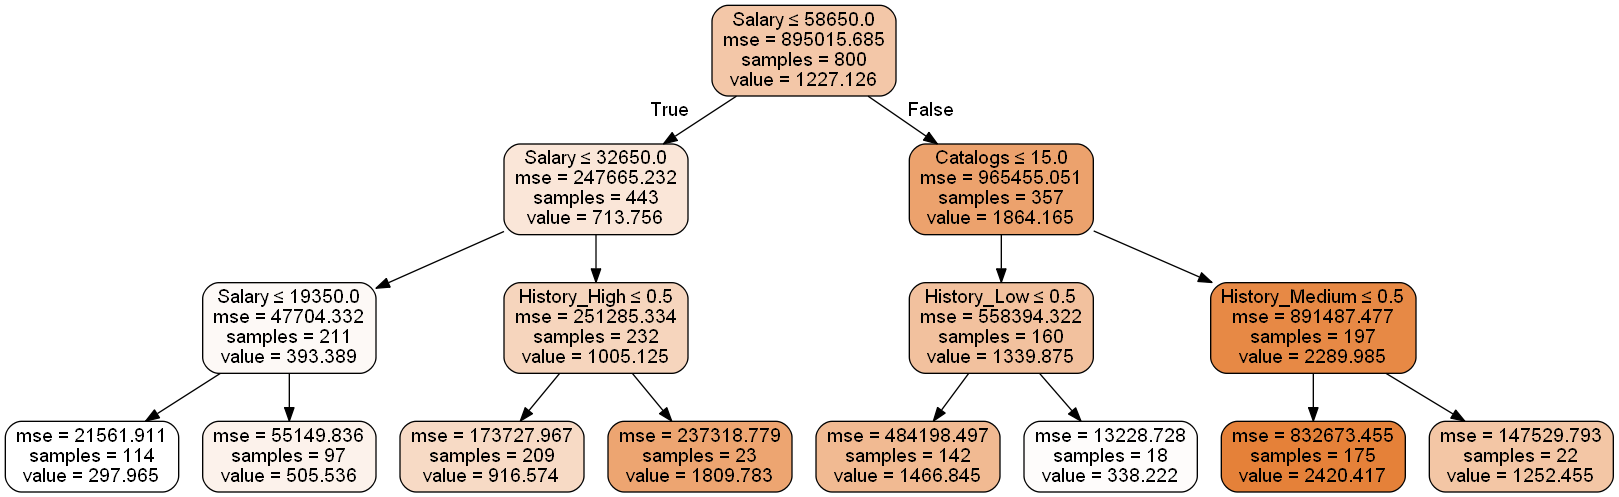

In [17]:
from IPython.display import Image
Image(graph.create_png())